In [1]:
import emat
import numpy
from matplotlib import pyplot as plt

In [2]:
from emat.util.distributions import pert, triangle, uniform, get_bounds

## Uniform Distribution

The uniform distribution is defined by a probability density function that is a rectangle.
It is parameterized using two parameters (minimum, maximum).  It is a simple 
distribution that is easy to understand and explain, and is often assumed as the
implied default distribution for exploratory analysis.

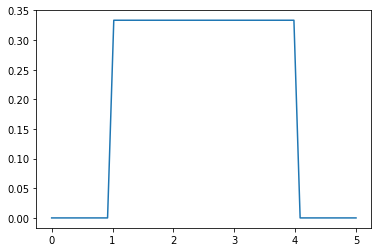

In [3]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 4
        min: 1
        max: 4
        dist: uniform
        dtype: float
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = (0,5)
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

It is also valid to include the `min` and `max` values under the `dist` key, instead of 
as top level keys for the parameter definition.

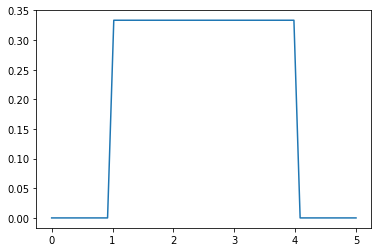

In [4]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 4
        dist: 
            name: uniform
            min: 1
            max: 4
        dtype: float
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = (0,5)
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

## Triangle Distribution

The triangle distribution is defined by a probability density function that is a triangle.
It is parameterized using three parameters (minimum, peak, maximum).  It is a simple 
distribution that is easy to understand and explain, and unlike the uniform distribution,
it allow more likelihood to be directed towards some particular value.

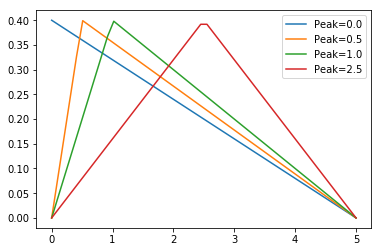

In [5]:
x = numpy.linspace(0,5)
plt.plot(x, triangle(lower_bound=0, upper_bound=5, peak=0.0).pdf(x), label='Peak=0.0')
plt.plot(x, triangle(lower_bound=0, upper_bound=5, peak=0.5).pdf(x), label='Peak=0.5')
plt.plot(x, triangle(lower_bound=0, upper_bound=5, peak=1.0).pdf(x), label='Peak=1.0')
plt.plot(x, triangle(lower_bound=0, upper_bound=5, peak=2.5).pdf(x), label='Peak=2.5')
_=plt.legend()

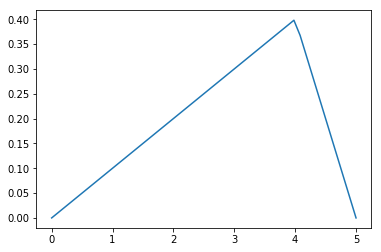

In [6]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 4
        min: 0
        max: 5
        dist: 
            name: triangle
            peak: 4
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = get_bounds(s['uncertain_variable_name'])
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

It is also valid to include the `min` and `max` values under the `dist` key, instead of 
as top level keys for the parameter definition.

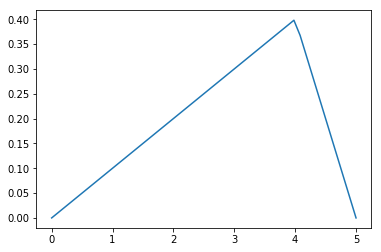

In [7]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 4
        dist: 
            name: triangle
            min: 0
            peak: 4
            max: 5
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = get_bounds(s['uncertain_variable_name'])
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

## PERT Distribution

The PERT distrubution ("PERT" is an acronym for "project evaluation and review techniques")
is a generally bell-shaped curve that, unlike the normal distribution, has finite minimum and
maximum values.  It can be parameterized similar to the triangular distribution, using
three parameters (minimum, peak, maximum).  This allows a skew to be introduced, by setting 
the peak value to be other-than the midpoint between maximum and minimum values.

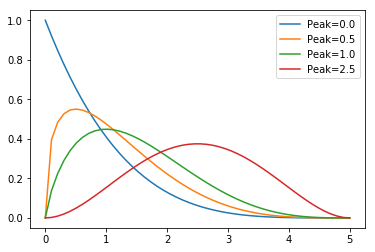

In [8]:
plt.plot(x, pert(lower_bound=0, upper_bound=5, peak=0.0).pdf(x), label='Peak=0.0')
plt.plot(x, pert(lower_bound=0, upper_bound=5, peak=0.5).pdf(x), label='Peak=0.5')
plt.plot(x, pert(lower_bound=0, upper_bound=5, peak=1.0).pdf(x), label='Peak=1.0')
plt.plot(x, pert(lower_bound=0, upper_bound=5, peak=2.5).pdf(x), label='Peak=2.5')
_=plt.legend()

The relative peakiness (i.e., kurtosis) of the distribution can be controlled 
using the gamma parameter.  The default value of gamma for a PERT distrubution is 4.0,
but other positive numbers can be used as well, with
higher numbers for a distribution that more favors outcomes
near the peak, or smaller numbers for a distribution that gives less pronounced
weight to value near the peak, and relatively more weight to the tails.  In the limit,
setting gamma to zero results in a uniform distribution.

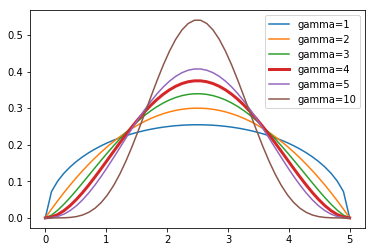

In [9]:
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=1).pdf(x), label='gamma=1')
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=2).pdf(x), label='gamma=2')
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=3).pdf(x), label='gamma=3')
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=4).pdf(x), label='gamma=4', lw=3.0)
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=5).pdf(x), label='gamma=5')
plt.plot(x, pert(lower_bound=0, upper_bound=5, gamma=10).pdf(x), label='gamma=10')
_=plt.legend()

The PERT distribution can be indicated in a yaml scope file using the name "pert",
with optional values for other named arguments outlined in the function docstring
shown above.

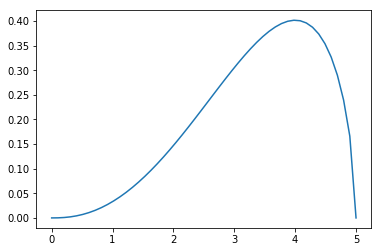

In [10]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 1.0
        min: 0
        max: 5
        dist: 
            name: pert
            peak: 4
            gamma: 3
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = get_bounds(s['uncertain_variable_name'])
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

It is also valid to include the `min` and `max` values under the `dist` key, instead of 
as top level keys for the parameter definition.

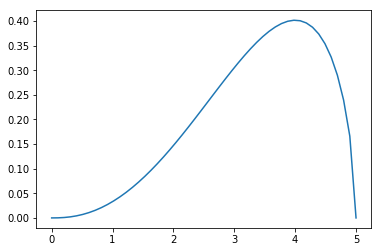

In [11]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 1.0
        dist: 
            name: pert
            min: 0
            max: 5
            peak: 4
            gamma: 3
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = get_bounds(s['uncertain_variable_name'])
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)

## Other Distributions

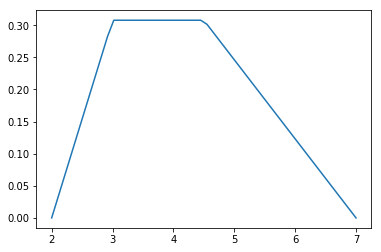

In [12]:
y = """---
scope:
    name: demonstration
inputs:
    uncertain_variable_name:
        ptype: uncertainty
        desc: Slightly More Verbose Description
        default: 1.0
        dist: 
            name: trapz
            c: 0.2
            d: 0.5
            loc: 2
            scale: 5
outputs:
    performance_measure_name:
        kind: maximize
...
"""
s = emat.Scope('t.yaml', scope_def=y)
bounds = get_bounds(s['uncertain_variable_name'])
x = numpy.linspace(*bounds)
y = s['uncertain_variable_name'].dist.pdf(x)
_=plt.plot(x,y)